# sentiment analysis

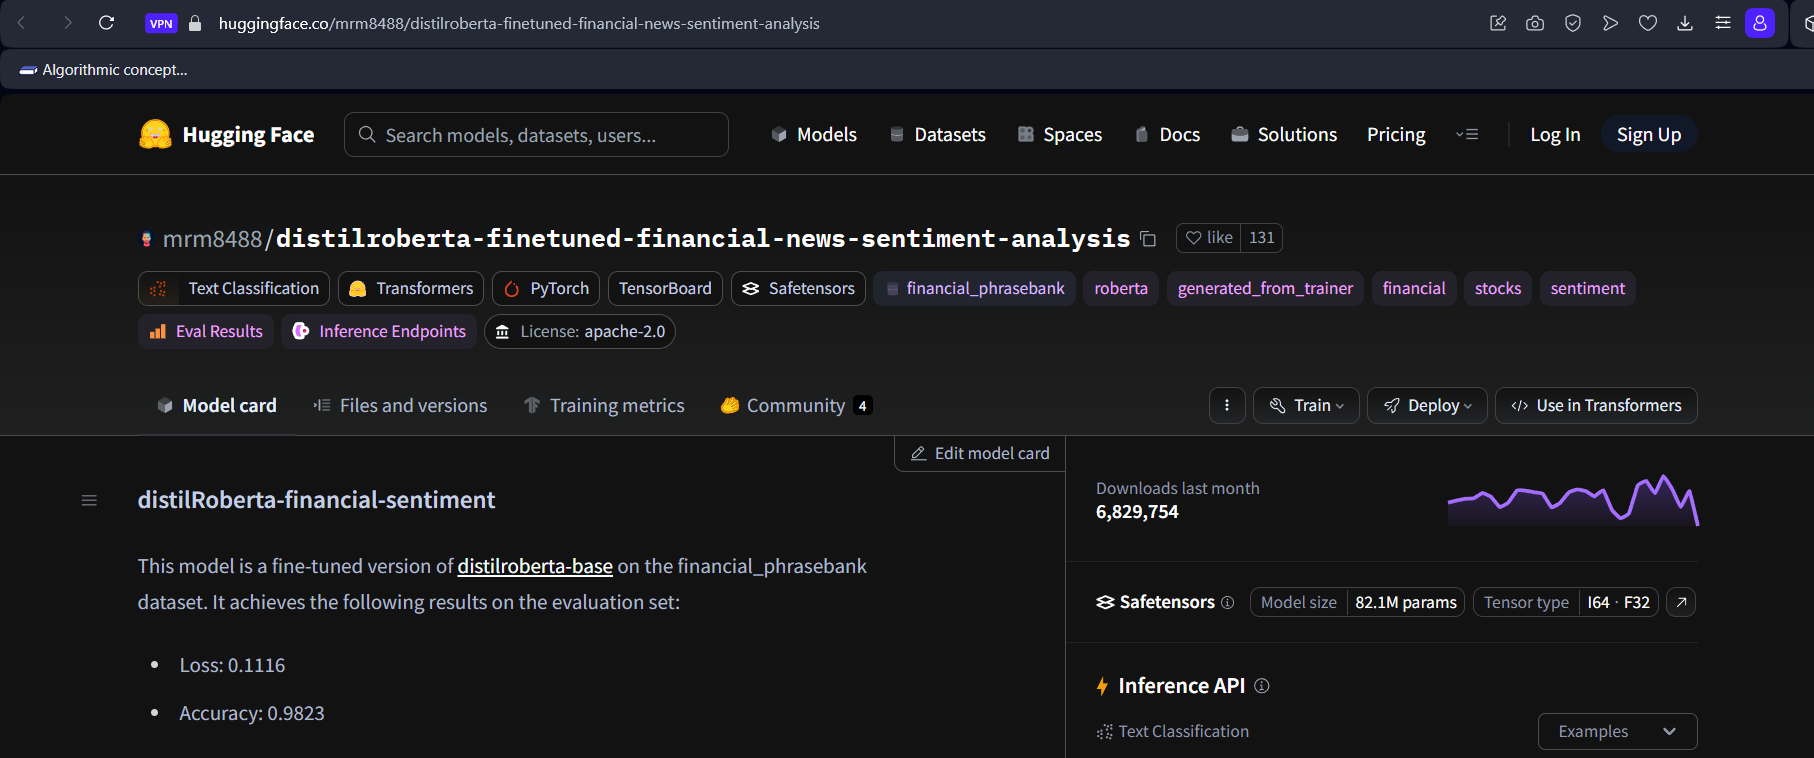

In [7]:
import pandas as pd
from tqdm.notebook import tqdm 
from transformers import pipeline

specific_model = pipeline(model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")


In [8]:
data = ["I love you", "I hate you", "J.B. Hunt (JBHT) Q3 Earnings & Revenues Lag Estimates, Down Y/Y (Zacks)"]
specific_model(data)


[{'label': 'neutral', 'score': 0.9997156262397766},
 {'label': 'neutral', 'score': 0.9994131326675415},
 {'label': 'negative', 'score': 0.9984885454177856}]

In [9]:
news_esg = pd.read_csv('data/news_esg.csv')
news_esg

,Unnamed: 0,Date,Time,Headline,Ticker
0,0,NaN,08:24:00,Worthington Enterprises May Soon Be Facing a P...,WOR
1,1,2023-12-15,17:50:00,Worthington Industries (WOR) Gains As Market D...,WOR
2,2,2023-12-06,17:50:00,Worthington Industries (WOR) Advances While Ma...,WOR
3,3,2023-12-05,08:30:00,Worthington Enterprises Schedules Second Quart...,WOR
4,4,2023-12-04,16:10:00,Worthington Steel to Webcast Discussion of Sec...,WOR
...,...,...,...,...,...
9889,9889,2023-10-11,10:07:00,Post Holdings' (POST) Latest Acquisition Move ...,HRL
9890,9890,2023-10-11,10:05:00,Hormel Foods (HRL) Battles Supply-Chain Issues...,HRL
9891,9891,2023-10-09,09:25:00,Hormel Foods Announces Webcast of 2023 Investo...,HRL
9892,9892,2023-10-06,09:15:00,Hormel Foods Commits to Reducing Greenhouse Ga...,HRL


In [9]:
# Use tqdm with apply for tracking progress
tqdm.pandas()

# Apply sentiment analysis function to Headline column using tqdm
news_esg['sentiment'] = news_esg['Headline'].progress_apply(lambda x: specific_model(x)[0]['label'])

  0%|          | 0/9893 [00:00<?, ?it/s]

In [10]:
news_esg

,Unnamed: 0,Date,Time,Headline,Ticker
0,0,NaN,08:24:00,Worthington Enterprises May Soon Be Facing a P...,WOR
1,1,2023-12-15,17:50:00,Worthington Industries (WOR) Gains As Market D...,WOR
2,2,2023-12-06,17:50:00,Worthington Industries (WOR) Advances While Ma...,WOR
3,3,2023-12-05,08:30:00,Worthington Enterprises Schedules Second Quart...,WOR
4,4,2023-12-04,16:10:00,Worthington Steel to Webcast Discussion of Sec...,WOR
...,...,...,...,...,...
9889,9889,2023-10-11,10:07:00,Post Holdings' (POST) Latest Acquisition Move ...,HRL
9890,9890,2023-10-11,10:05:00,Hormel Foods (HRL) Battles Supply-Chain Issues...,HRL
9891,9891,2023-10-09,09:25:00,Hormel Foods Announces Webcast of 2023 Investo...,HRL
9892,9892,2023-10-06,09:15:00,Hormel Foods Commits to Reducing Greenhouse Ga...,HRL


# Another sentiment analysis

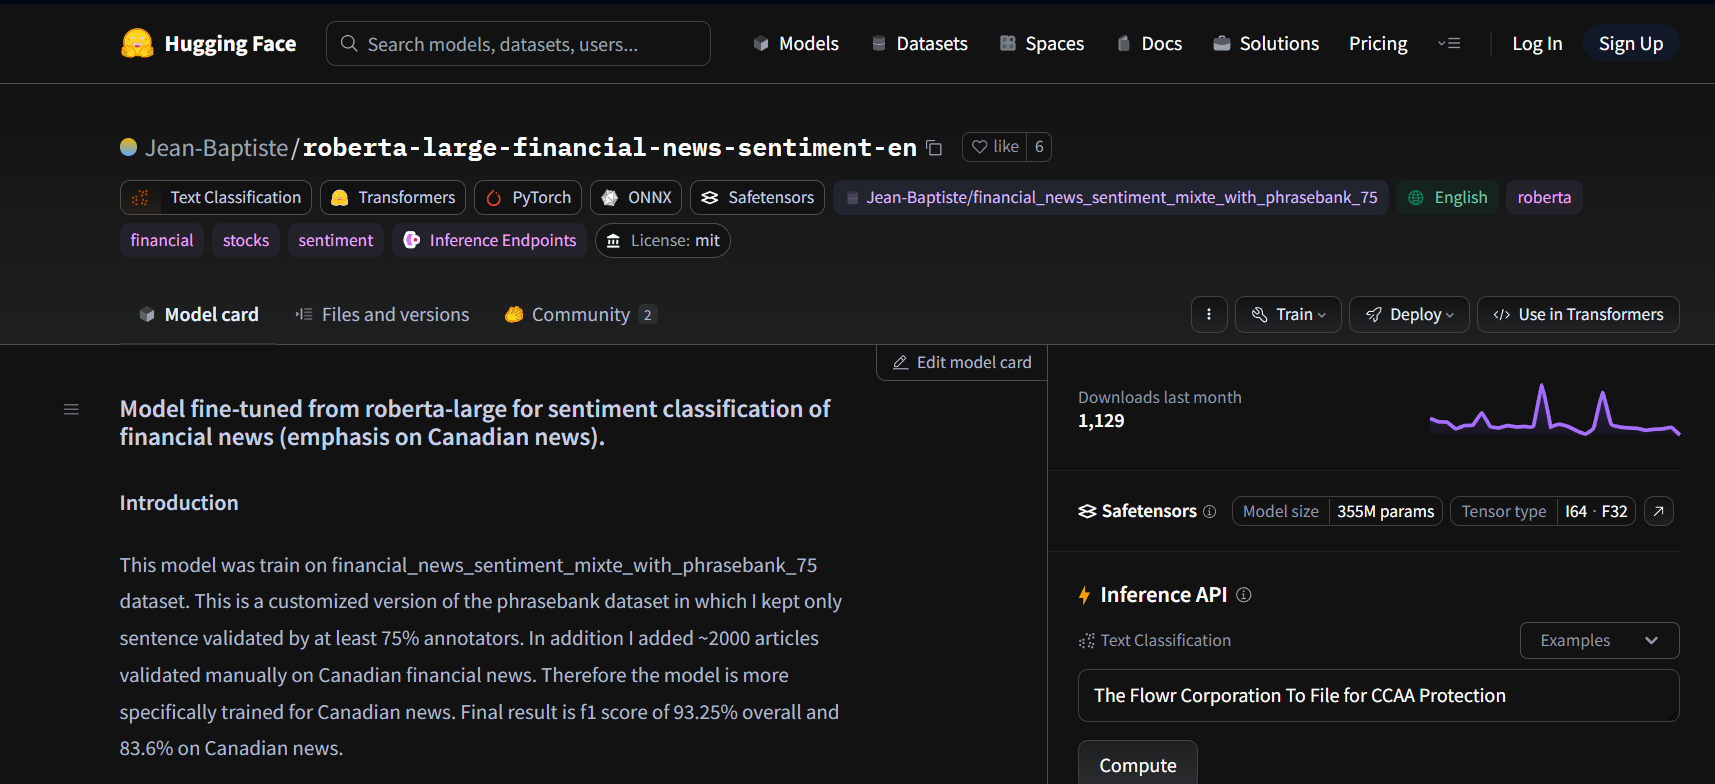

In [24]:
# !pip3 install torch torchvision torchaudio
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm 


In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/roberta-large-financial-news-sentiment-en")
model = AutoModelForSequenceClassification.from_pretrained("Jean-Baptiste/roberta-large-financial-news-sentiment-en")


##### Process text sample (from wikipedia)

from transformers import pipeline

pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)
pipe("Melcor REIT (TSX: MR.UN) today announced results for the third quarter ended September 30, 2022. Revenue was stable in the quarter and year-to-date. Net operating income was down 3% in the quarter at $11.61 million due to the timing of operating expenses and inflated costs including utilities like gas/heat and power")


config.json:   0%|          | 0.00/960 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

[{'label': 'negative', 'score': 0.9399105906486511}]

In [6]:
news_esg = pd.read_csv('data/news_esg.csv',index_col=0 )
news_esg

,Date,Time,Headline,Ticker
0,NaN,08:24:00,Worthington Enterprises May Soon Be Facing a P...,WOR
1,2023-12-15,17:50:00,Worthington Industries (WOR) Gains As Market D...,WOR
2,2023-12-06,17:50:00,Worthington Industries (WOR) Advances While Ma...,WOR
3,2023-12-05,08:30:00,Worthington Enterprises Schedules Second Quart...,WOR
4,2023-12-04,16:10:00,Worthington Steel to Webcast Discussion of Sec...,WOR
...,...,...,...,...
9889,2023-10-11,10:07:00,Post Holdings' (POST) Latest Acquisition Move ...,HRL
9890,2023-10-11,10:05:00,Hormel Foods (HRL) Battles Supply-Chain Issues...,HRL
9891,2023-10-09,09:25:00,Hormel Foods Announces Webcast of 2023 Investo...,HRL
9892,2023-10-06,09:15:00,Hormel Foods Commits to Reducing Greenhouse Ga...,HRL


In [14]:
tqdm.pandas() # tracking progress

# Apply sentiment analysis function to Headline column using tqdm !
news_esg['sentiment_JB'] = news_esg['Headline'].progress_apply(lambda x: pipe(x)[0]['label'])


  0%|          | 0/9894 [00:00<?, ?it/s]

In [22]:
news_esg["sentiment_endoded_JB"]=news_esg['sentiment_JB'].map({'negative':-1, 'neutral':0, 'positive':1})
news_esg.dropna(inplace=True)
news_esg

,Date,Time,Headline,Ticker,sentiment_JB,sentiment_endoded_JB
1,2023-12-15,17:50:00,Worthington Industries (WOR) Gains As Market D...,WOR,positive,1
2,2023-12-06,17:50:00,Worthington Industries (WOR) Advances While Ma...,WOR,neutral,0
3,2023-12-05,08:30:00,Worthington Enterprises Schedules Second Quart...,WOR,neutral,0
4,2023-12-04,16:10:00,Worthington Steel to Webcast Discussion of Sec...,WOR,neutral,0
5,2023-12-01,08:30:00,Worthington Enterprises Completes Separation o...,WOR,neutral,0
...,...,...,...,...,...,...
9889,2023-10-11,10:07:00,Post Holdings' (POST) Latest Acquisition Move ...,HRL,positive,1
9890,2023-10-11,10:05:00,Hormel Foods (HRL) Battles Supply-Chain Issues...,HRL,negative,-1
9891,2023-10-09,09:25:00,Hormel Foods Announces Webcast of 2023 Investo...,HRL,neutral,0
9892,2023-10-06,09:15:00,Hormel Foods Commits to Reducing Greenhouse Ga...,HRL,positive,1


In [19]:
news_esg.to_csv('data/news_esg_sentiment2.csv')
# 60 % neutral, 24 positive ??

## start from here

In [16]:
import pandas as pd
import numpy as np

news_esg = pd.read_csv('data/news_esg_sentiment2.csv')

# Aggregate sentiment data
aggregated_sentiment = news_esg.groupby(['Ticker', 'Date']).agg({'sentiment_endoded_JB': 'sum'}).reset_index()
aggregated_sentiment


,Ticker,Date,sentiment_endoded_JB
0,A,2023-07-03,1
1,A,2023-07-05,1
2,A,2023-07-06,-1
3,A,2023-07-10,1
4,A,2023-07-19,0
...,...,...,...
5560,XOM,2023-12-13,-2
5561,XOM,2023-12-14,1
5562,XOM,2023-12-15,-1
5563,XOM,2023-12-17,0


In [17]:
percent_diff_3days = pd.read_csv('data/percent_diff_3days.csv')

In [18]:
def calculate_ticker_value(aggregated_sentiment, percent_diff):
    percent_ticker_per_day = []
    for i in range(len(aggregated_sentiment)):
        date = aggregated_sentiment['Date'][i]
        ticker = aggregated_sentiment['Ticker'][i]

        # Let's find the corresponding row in percent_diff based on the date
        selected_rows = percent_diff.loc[percent_diff['Date'] == date]

        # Ensure there are rows for the given date in percent_diff
        if not selected_rows.empty:
            # Find the value for the specified ticker in the selected row
            ticker_value = selected_rows[ticker].iloc[0]
            percent_ticker_per_day.append(float(ticker_value))
        else:
            # Handle cases where there might be no matching date in percent_diff
            # Append NaN as a placeholder for missing values
            ticker_value = np.nan
            percent_ticker_per_day.append(ticker_value)

    # Add the 'ticker_value' column to aggregated_sentiment
    aggregated_sentiment['ticker_value'] = percent_ticker_per_day
    aggregated_sentiment.dropna(inplace=True)

    return aggregated_sentiment

aggregated_sentiment = calculate_ticker_value(aggregated_sentiment, percent_diff_3days)
aggregated_sentiment

# aggregated_sentiment = calculate_ticker_value(aggregated_sentiment, rolling_diff_3days)
# aggregated_sentiment


,Ticker,Date,sentiment_endoded_JB,ticker_value
0,A,2023-07-03,1,2.535015
1,A,2023-07-05,1,1.228290
2,A,2023-07-06,-1,-1.513513
3,A,2023-07-10,1,-0.953974
4,A,2023-07-19,0,2.780795
...,...,...,...,...
5559,XOM,2023-12-12,-1,-0.375935
5560,XOM,2023-12-13,-2,-0.632853
5561,XOM,2023-12-14,1,1.967475
5562,XOM,2023-12-15,-1,2.906679


In [19]:
aggregated_sentiment[['sentiment_endoded_JB','ticker_value']].corr()

,sentiment_endoded_JB,ticker_value
sentiment_endoded_JB,1.000000,0.187212
ticker_value,0.187212,1.000000


# ML


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your data is stored in a DataFrame called aggregated_sentiment
# Separate features and target variable
X = aggregated_sentiment[['Ticker', 'Date', 'sentiment_endoded_JB']]
y = aggregated_sentiment['ticker_value']

# Convert categorical variables to one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Ticker'])


# Convert the 'Date' column to a datetime format
X['Date'] = pd.to_datetime(X['Date'])

# Extract year, month, and day features from the 'Date' column
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day

# Drop the original 'Date' column
X = X.drop('Date', axis=1)

# Continue with encoding and splitting the data as before
X_encoded = pd.get_dummies(X, columns=['Ticker'])


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = RandomForestRegressor(n_estimators=20, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Feature Importance
feature_importance = model.feature_importances_
feature_names = X_encoded.columns

# Pair feature names with their importance scores and sort them
feature_importance_list = list(zip(feature_names, feature_importance))
sorted_feature_importance = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

print("\nTop Features:")
for feature, importance in sorted_feature_importance[:10]:
    print(f"{feature}: {importance}")



C:\Users\Aurélien\AppData\Local\Temp\ipykernel_9524\2915490558.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date'] = pd.to_datetime(X['Date'])


Root Mean Squared Error: 3.6567000290581753
R-squared: 0.2509422901552921

Top Features:
Day: 0.2254464719069349
Month: 0.14384236480952764
sentiment_endoded_JB: 0.0881384608805998
Ticker_COMM: 0.033780713576057046
Year: 0.026305366609310002
Ticker_ARCH: 0.018904746047878732
Ticker_EPAM: 0.01735504812975091
Ticker_FSLR: 0.016078235868263114
Ticker_ALB: 0.01445006234746248
Ticker_WCC: 0.014059104814034084


# Use case demonstration

In [22]:
X_encoded

,sentiment_endoded_JB,Year,Month,Day,Ticker_A,Ticker_AAPL,Ticker_ADI,Ticker_ADM,Ticker_AEE,Ticker_AEP,...,Ticker_VC,Ticker_VLO,Ticker_VRSK,Ticker_VVV,Ticker_WCC,Ticker_WEC,Ticker_WMB,Ticker_WOR,Ticker_XEL,Ticker_XOM
0,1,2023,7,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,2023,7,5,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-1,2023,7,6,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,2023,7,10,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2023,7,19,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5559,-1,2023,12,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5560,-2,2023,12,13,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5561,1,2023,12,14,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5562,-1,2023,12,15,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [36]:
X_encoded.columns[4:]

Index(['Ticker_A', 'Ticker_AAPL', 'Ticker_ADI', 'Ticker_ADM', 'Ticker_AEE',
       'Ticker_AEP', 'Ticker_AES', 'Ticker_AJG', 'Ticker_ALB', 'Ticker_AM',
       'Ticker_AMT', 'Ticker_ANET', 'Ticker_APD', 'Ticker_ARCH', 'Ticker_ASH',
       'Ticker_AVY', 'Ticker_BG', 'Ticker_BR', 'Ticker_BTU', 'Ticker_CAG',
       'Ticker_CALM', 'Ticker_CBT', 'Ticker_CDNS', 'Ticker_CMG', 'Ticker_CMI',
       'Ticker_CMS', 'Ticker_COMM', 'Ticker_COP', 'Ticker_CVX', 'Ticker_D',
       'Ticker_DAR', 'Ticker_DE', 'Ticker_DECK', 'Ticker_DHR', 'Ticker_DOX',
       'Ticker_DTE', 'Ticker_ED', 'Ticker_EPAM', 'Ticker_ES', 'Ticker_EXC',
       'Ticker_EXPO', 'Ticker_FMC', 'Ticker_FSLR', 'Ticker_FSS', 'Ticker_GEF',
       'Ticker_HAL', 'Ticker_HES', 'Ticker_HRL', 'Ticker_HST', 'Ticker_IBM',
       'Ticker_IT', 'Ticker_JBHT', 'Ticker_JBL', 'Ticker_KBR', 'Ticker_KDP',
       'Ticker_KEYS', 'Ticker_KMI', 'Ticker_KO', 'Ticker_KR', 'Ticker_LECO',
       'Ticker_LLY', 'Ticker_LNG', 'Ticker_LNT', 'Ticker_LTHM', 'Ticker_MA',

In [46]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/roberta-large-financial-news-sentiment-en")
specific_model = AutoModelForSequenceClassification.from_pretrained("Jean-Baptiste/roberta-large-financial-news-sentiment-en")

pipe = pipeline("text-classification", model=specific_model, tokenizer=tokenizer)
# pipe("Melcor REIT (TSX: MR.UN) today announced results for the third quarter ended September 30, 2022. Revenue was stable in the quarter and year-to-date. Net operating income was down 3% in the quarter at $11.61 million due to the timing of operating expenses and inflated costs including utilities like gas/heat and power")


# Function to get sentiment score for an article with its Ticker name
def get_sentiment_score(article, ticker):
    # Perform sentiment analysis on the article text
    sentiment_result = pipe(article)
    
    # Extract sentiment label and score
    sentiment_label = sentiment_result[0]['label']
    sentiment_score = sentiment_result[0]['score']
    
    return sentiment_label, sentiment_score

# Example article and Ticker name
article_text = "Catastrophique news for Apple ! no more future for the companie"
ticker_name = "AAPL"  # Replace with the actual Ticker name

# Get sentiment score for the provided article
sentiment_label, sentiment_score = get_sentiment_score(article_text, ticker_name)



print(f"Sentiment Label: {sentiment_label}")
print(f"Sentiment Score: {sentiment_score}")

# Convert sentiment label to numerical score
def convert_sentiment_to_score(sentiment_label):
    sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
    return sentiment_mapping.get(sentiment_label, 0)  # Default to 0 if label is not found

# Convert sentiment label to numerical score
sentiment_score_numeric = convert_sentiment_to_score(sentiment_label)
print("sentiment_score_numeric :", sentiment_score_numeric)

input_data = {
    'Date': '2023-12-30',  # Replace with the article's date
    'sentiment_endoded_JB': sentiment_score_numeric  # Sentiment score converted to numerical form
}

# Convert input data to DataFrame for prediction
input_df = pd.DataFrame([input_data])

# # Encode categorical variables and extract date features
# input_df_encoded = pd.get_dummies(input_df, columns=['Ticker'])

input_df['Date'] = pd.to_datetime(input_df['Date'])
input_df['Year'] = input_df['Date'].dt.year
input_df['Month'] = input_df['Date'].dt.month
input_df['Day'] = input_df['Date'].dt.day
input_df = input_df.drop('Date', axis=1)

X_encoded_ticker_columns =['Ticker_A', 'Ticker_AAPL', 'Ticker_ADI', 'Ticker_ADM', 'Ticker_AEE',
       'Ticker_AEP', 'Ticker_AES', 'Ticker_AJG', 'Ticker_ALB', 'Ticker_AM',
       'Ticker_AMT', 'Ticker_ANET', 'Ticker_APD', 'Ticker_ARCH', 'Ticker_ASH',
       'Ticker_AVY', 'Ticker_BG', 'Ticker_BR', 'Ticker_BTU', 'Ticker_CAG',
       'Ticker_CALM', 'Ticker_CBT', 'Ticker_CDNS', 'Ticker_CMG', 'Ticker_CMI',
       'Ticker_CMS', 'Ticker_COMM', 'Ticker_COP', 'Ticker_CVX', 'Ticker_D',
       'Ticker_DAR', 'Ticker_DE', 'Ticker_DECK', 'Ticker_DHR', 'Ticker_DOX',
       'Ticker_DTE', 'Ticker_ED', 'Ticker_EPAM', 'Ticker_ES', 'Ticker_EXC',
       'Ticker_EXPO', 'Ticker_FMC', 'Ticker_FSLR', 'Ticker_FSS', 'Ticker_GEF',
       'Ticker_HAL', 'Ticker_HES', 'Ticker_HRL', 'Ticker_HST', 'Ticker_IBM',
       'Ticker_IT', 'Ticker_JBHT', 'Ticker_JBL', 'Ticker_KBR', 'Ticker_KDP',
       'Ticker_KEYS', 'Ticker_KMI', 'Ticker_KO', 'Ticker_KR', 'Ticker_LECO',
       'Ticker_LLY', 'Ticker_LNG', 'Ticker_LNT', 'Ticker_LTHM', 'Ticker_MA',
       'Ticker_MAR', 'Ticker_MAT', 'Ticker_MDLZ', 'Ticker_MPC', 'Ticker_MRK',
       'Ticker_MRO', 'Ticker_MSM', 'Ticker_NEE', 'Ticker_NRG', 'Ticker_NSP',
       'Ticker_OKE', 'Ticker_ON', 'Ticker_ORA', 'Ticker_OXY', 'Ticker_PEP',
       'Ticker_PKG', 'Ticker_PSA', 'Ticker_PSX', 'Ticker_RRC', 'Ticker_SCL',
       'Ticker_SHO', 'Ticker_SRE', 'Ticker_TMO', 'Ticker_TXN', 'Ticker_VC',
       'Ticker_VLO', 'Ticker_VRSK', 'Ticker_VVV', 'Ticker_WCC', 'Ticker_WEC',
       'Ticker_WMB', 'Ticker_WOR', 'Ticker_XEL', 'Ticker_XOM']
input_df[[X_encoded_ticker_columns]] = False
# input_df[[X_encoded.columns[4:]]] = False
input_df.loc[0, f'Ticker_{ticker_name}'] = True

# Make the prediction
prediction = model.predict(input_df)
print(f"Predicted Stock Value: {prediction}")


Sentiment Label: negative
Sentiment Score: 0.9385149478912354
sentiment_score_numeric : -1
Predicted Stock Value: [-0.40489712]


C:\Users\Aurélien\AppData\Local\Temp\ipykernel_9524\617036520.py:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[[X_encoded_ticker_columns]] = False
C:\Users\Aurélien\AppData\Local\Temp\ipykernel_9524\617036520.py:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[[X_encoded_ticker_columns]] = False
C:\Users\Aurélien\AppData\Local\Temp\ipykernel_9524\617036520.py:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.

In [43]:
from joblib import dump

# 'model' is trained RandomForestRegressor model
dump(model, 'data/saved_model.joblib')

from joblib import load

model = load('data/saved_model.joblib')

# User Interface

In [47]:
def user_interface():
    # Prompt the user for article text
    article_text = input("Enter the article text for sentiment analysis: ")
    ticker_name = input("ticker_name :")
    # Use the existing get_sentiment_score function to get the sentiment
    sentiment_label, sentiment_score = get_sentiment_score(article_text, "Ticker")

    # Print the results
    print(f"Sentiment Label: {sentiment_label}")
    print(f"Sentiment Score: {sentiment_score}")

    # Convert sentiment label to numerical score
    sentiment_score_numeric = convert_sentiment_to_score(sentiment_label)
    print("Sentiment Score Numeric:", sentiment_score_numeric)

    # Prepare the data for prediction (assuming you have a model and necessary preprocessing steps)
    input_data = {
        'Date': '2023-12-30',  # Replace with the article's date if available
        'sentiment_endoded_JB': sentiment_score_numeric
    }
    input_df = pd.DataFrame([input_data])
    input_df['Date'] = pd.to_datetime(input_df['Date'])
    input_df['Year'] = input_df['Date'].dt.year
    input_df['Month'] = input_df['Date'].dt.month
    input_df['Day'] = input_df['Date'].dt.day
    input_df = input_df.drop('Date', axis=1)

    # Assuming X_encoded and model are already defined and available
    X_encoded_ticker_columns =['Ticker_A', 'Ticker_AAPL', 'Ticker_ADI', 'Ticker_ADM', 'Ticker_AEE',
        'Ticker_AEP', 'Ticker_AES', 'Ticker_AJG', 'Ticker_ALB', 'Ticker_AM',
        'Ticker_AMT', 'Ticker_ANET', 'Ticker_APD', 'Ticker_ARCH', 'Ticker_ASH',
        'Ticker_AVY', 'Ticker_BG', 'Ticker_BR', 'Ticker_BTU', 'Ticker_CAG',
        'Ticker_CALM', 'Ticker_CBT', 'Ticker_CDNS', 'Ticker_CMG', 'Ticker_CMI',
        'Ticker_CMS', 'Ticker_COMM', 'Ticker_COP', 'Ticker_CVX', 'Ticker_D',
        'Ticker_DAR', 'Ticker_DE', 'Ticker_DECK', 'Ticker_DHR', 'Ticker_DOX',
        'Ticker_DTE', 'Ticker_ED', 'Ticker_EPAM', 'Ticker_ES', 'Ticker_EXC',
        'Ticker_EXPO', 'Ticker_FMC', 'Ticker_FSLR', 'Ticker_FSS', 'Ticker_GEF',
        'Ticker_HAL', 'Ticker_HES', 'Ticker_HRL', 'Ticker_HST', 'Ticker_IBM',
        'Ticker_IT', 'Ticker_JBHT', 'Ticker_JBL', 'Ticker_KBR', 'Ticker_KDP',
        'Ticker_KEYS', 'Ticker_KMI', 'Ticker_KO', 'Ticker_KR', 'Ticker_LECO',
        'Ticker_LLY', 'Ticker_LNG', 'Ticker_LNT', 'Ticker_LTHM', 'Ticker_MA',
        'Ticker_MAR', 'Ticker_MAT', 'Ticker_MDLZ', 'Ticker_MPC', 'Ticker_MRK',
        'Ticker_MRO', 'Ticker_MSM', 'Ticker_NEE', 'Ticker_NRG', 'Ticker_NSP',
        'Ticker_OKE', 'Ticker_ON', 'Ticker_ORA', 'Ticker_OXY', 'Ticker_PEP',
        'Ticker_PKG', 'Ticker_PSA', 'Ticker_PSX', 'Ticker_RRC', 'Ticker_SCL',
        'Ticker_SHO', 'Ticker_SRE', 'Ticker_TMO', 'Ticker_TXN', 'Ticker_VC',
        'Ticker_VLO', 'Ticker_VRSK', 'Ticker_VVV', 'Ticker_WCC', 'Ticker_WEC',
        'Ticker_WMB', 'Ticker_WOR', 'Ticker_XEL', 'Ticker_XOM']
    
    input_df[[X_encoded_ticker_columns]] = False
    # input_df[[X_encoded.columns[4:]]] = False
    input_df.loc[0, f'Ticker_{ticker_name}'] = True
    
    model = load('data/saved_model.joblib')
    # Make the prediction
    prediction = model.predict(input_df)
    print(f"Predicted Stock Value: {prediction}")
    
user_interface()

Sentiment Label: negative
Sentiment Score: 0.936439037322998
Sentiment Score Numeric: -1
Predicted Stock Value: [-0.40489712]


C:\Users\Aurélien\AppData\Local\Temp\ipykernel_9524\3240845131.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[[X_encoded_ticker_columns]] = False
C:\Users\Aurélien\AppData\Local\Temp\ipykernel_9524\3240845131.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[[X_encoded_ticker_columns]] = False
C:\Users\Aurélien\AppData\Local\Temp\ipykernel_9524\3240845131.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performan